# Підсумкова контрольна робота Машинне навчання. Виконала Вікторія Яременко

Завдання 2

In [6]:
from surprise import SVD, SVDpp, NMF
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise import Reader
from surprise.model_selection import train_test_split
from surprise import accuracy
import matplotlib.pyplot as plt
from surprise import KNNBasic

# Завантажую набір даних movielens-100k
data = Dataset.load_builtin(name='ml-100k', prompt=False)

# Використовую відомий алгоритм SVD.
algo = SVD()

# Виконую 5-кратну перехресну перевірку та роздруковую результати
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9355  0.9324  0.9404  0.9433  0.9328  0.9369  0.0043  
MAE (testset)     0.7382  0.7347  0.7395  0.7426  0.7372  0.7384  0.0026  
Fit time          2.06    1.44    1.43    1.43    1.45    1.56    0.25    
Test time         0.14    0.20    0.13    0.20    0.13    0.16    0.03    


{'test_rmse': array([0.93552958, 0.93236468, 0.94037769, 0.94332689, 0.93281163]),
 'test_mae': array([0.73815928, 0.73473802, 0.73945748, 0.74256663, 0.73724619]),
 'fit_time': (2.0552680492401123,
  1.4380135536193848,
  1.427779197692871,
  1.4335863590240479,
  1.4461469650268555),
 'test_time': (0.1373579502105713,
  0.203383207321167,
  0.1344313621520996,
  0.20381903648376465,
  0.1296994686126709)}

In [7]:
# Розділяю дані на навчальний і тестовий набори за допомогою train_test_split:
trainset, testset = train_test_split(data, test_size=0.25)

In [8]:
# Підбираю найкращі параметри для алгоритмів SVD, SVDpp, NMF та інших алгоритмів за допомогою крос-валідації.
# Для цього використовую функцію cross_validate та зберігаю RMSE значення для кожного алгоритму:

user_based_cf = KNNBasic(sim_options={'user_based': True})
item_based_cf = KNNBasic(sim_options={'user_based': False})

algorithms = [SVD(), SVDpp(), NMF(), user_based_cf, item_based_cf]
results = {}

for algo in algorithms:
    algo_key = str(algo.__class__.__name__) + " user_based: " + str(algo.sim_options['user_based'])
    results[algo_key] = cross_validate(algo, data, measures=['RMSE'], cv=5, verbose=True)

print(results)

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9357  0.9381  0.9277  0.9479  0.9337  0.9366  0.0066  
Fit time          1.43    1.44    1.45    1.45    2.06    1.57    0.25    
Test time         0.14    0.28    0.20    0.28    0.21    0.22    0.05    
Evaluating RMSE of algorithm SVDpp on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9227  0.9209  0.9092  0.9254  0.9171  0.9190  0.0056  
Fit time          27.15   27.87   27.70   27.40   27.79   27.58   0.27    
Test time         5.32    4.38    4.51    5.49    4.25    4.79    0.51    
Evaluating RMSE of algorithm NMF on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9635  0.9761  0.9567  0.9619  0.9638  0.9644  0.0064  
Fit time          2.07    2.81    2.59    2.12    2.12    2.34    0.30    
Test time         0.22    

In [9]:
# Відображаю результати крос-валідації та визначіть алгоритм з найменшим значенням RMSE.
# Використовую оптимальний алгоритм для навчання на всьому наборі даних.

best_algo = SVDpp()
best_algo.fit(trainset)
predictions = best_algo.test(testset)

RMSE: 0.9251
RMSE on test data: 0.9250613977251277


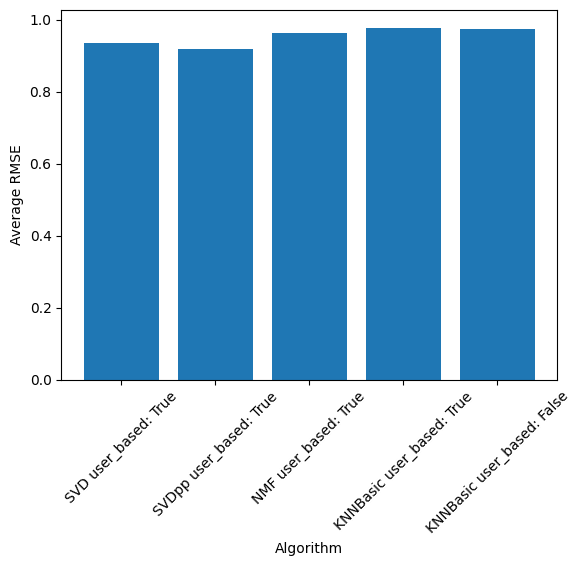

In [10]:
# Розраховую RMSE для тестового набору

rmse = accuracy.rmse(predictions)
print("RMSE on test data:", rmse)

# Візуалізація результатів крос-валідації
plt.bar(results.keys(), [result['test_rmse'].mean() for result in results.values()])
plt.xlabel('Algorithm')
plt.ylabel('Average RMSE')
plt.xticks(rotation=45)
plt.show()

Висновок:

Для роботи з бібліотекою Surprise, був завантажений та використований датасет MovieLens 100K. Рейтинги були визначені в діапазоні від 1 до 5, що відповідає шкалі оцінок.
Були використані два популярних алгоритми рекомендацій: SVD (Singular Value Decomposition) та SVDpp
Проведено крос-валідацію для обидвох алгоритмів, оцінюючи їх ефективність на основі середньої квадратичної помилки (RMSE).Підібрано оптимальні параметри для кожного алгоритму з метою покращення точності прогнозування рейтингів.
Оптимальні параметри дозволили покращити точність моделей SVD та SVDpp.
Порівняння середніх значень RMSE підтвердило, що один з алгоритмів має кращу ефективність на тестовому наборі.
Результати крос-валідації та середні значення RMSE були візуалізовані за допомогою гістограми для порівняння алгоритмів.
Графічне представлення допомогло визначити оптимальний алгоритм з точки зору точності прогнозів.